<a href="https://colab.research.google.com/github/leehwasu96/YOLO-v8/blob/main/YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#YOLO v8 다운로드
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.2/800.2 kB 7.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
from ultralytics import YOLO

# YOLOv8 모델 다운로드 및 초기화
model = YOLO('yolov8n.pt')  # 'yolov8n.pt'는 가장 작은 모델입니다. 다른 모델 크기도 사용할 수 있습니다.

100%|██████████| 6.25M/6.25M [00:00<00:00, 123MB/s]


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# 현재 경로 확인
!pwd

/content


In [5]:
# Roboflow에서 데이터셋 다운로드
# https://universe.roboflow.com/
!curl -L "https://universe.roboflow.com/ds/BtCO0zxaeS?key=eQVDTueP22" -o /content/roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   3664      0 --:--:-- --:--:-- --:--:--  3670
100 52.5M  100 52.5M    0     0  34.1M      0  0:00:01  0:00:01 --:--:-- 53.0M


In [8]:
# 압축 해제
!unzip /content/roboflow.zip -d /content/roboflow

Archive:  /content/roboflow.zip
  inflating: /content/roboflow/README.dataset.txt  
  inflating: /content/roboflow/README.roboflow.txt  
  inflating: /content/roboflow/data.yaml  
   creating: /content/roboflow/test/
   creating: /content/roboflow/test/images/
 extracting: /content/roboflow/test/images/-046E9840-F025-4749-B3AB-19402B34E739-png_jpg.rf.61fb28fc8210dc5a76d27598618bd697.jpg  
 extracting: /content/roboflow/test/images/-0ACAD937-70A4-46F0-8E49-0CAE6F942CF2-png_jpg.rf.377f60fc8175ff11e4e7f54cee044177.jpg  
 extracting: /content/roboflow/test/images/-1058CFB8-55AA-4270-937C-FAB55C49F17A-png_jpg.rf.a37ca443adb2be52ce2fe75f438fa3bc.jpg  
 extracting: /content/roboflow/test/images/-156F82DF-5099-4AEA-8574-19720B40C034-png_jpg.rf.5125e4a224dffbc6e2108adeede2cf5e.jpg  
 extracting: /content/roboflow/test/images/-192C4A31-07E9-4438-9D0D-63CF545747C8-png_jpg.rf.0e760b39af1d69108c91b0d57946bc2c.jpg  
 extracting: /content/roboflow/test/images/-192C4A31-07E9-4438-9D0D-63CF545747C8-png

In [9]:
# 압축 파일 삭제
!rm /content/roboflow.zip

In [10]:
# /content/roboflow 디렉토리의 파일 확인
!ls /content/roboflow

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [12]:
!ls

drive  roboflow  sample_data  yolov8n.pt


In [14]:
import os

# 파일을 읽고 수정하여 저장하는 방법
file_path = '/content/roboflow/data.yaml'

# 파일이 이미 존재하는 경우 내용을 읽어 출력
if os.path.exists(file_path):
    with open(file_path, 'r') as f:
        print(f.read())

# 파일을 수정하여 저장 (roboflow에서 다운로드 받은 데이터를 저장한 경로로 수정)
data_yaml_content = """
train: /content/roboflow/train/images
val: /content/roboflow/valid/images
test: /content/roboflow/test/images

nc: 1  # number of classes
names: ['car']  # class names
"""

with open(file_path, 'w') as f:
    f.write(data_yaml_content)

# 수정된 내용을 출력
with open(file_path, 'r') as f:
    print(f.read())



train: /content/roboflow/train/images
val: /content/roboflow/valid/images
test: /content/roboflow/test/images

nc: 1  # number of classes
names: ['car']  # class names


train: /content/roboflow/train/images
val: /content/roboflow/valid/images
test: /content/roboflow/test/images

nc: 1  # number of classes
names: ['car']  # class names



In [15]:
from ultralytics import YOLO
import os

# 필요한 디렉토리 생성
os.makedirs('/content/runs', exist_ok=True)

# YOLOv8 모델 로드
model = YOLO('yolov8n.yaml')  # 'yolov8n.yaml'는 YOLOv8의 기본 설정 파일입니다.

# 모델 학습
model.train(
    data='/content/roboflow/data.yaml',  # 데이터셋 설정 파일 경로
    epochs=50,       # 학습 epoch 수
    imgsz=640,        # 입력 이미지 크기
    batch=16,     # 배치 크기
    workers=4,        # 데이터 로딩을 위한 병렬 작업 수
    project='/content/runs',  # 결과를 저장할 디렉토리
    name='exp'  # 실험 이름
)


Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/roboflow/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=/content/runs, name=exp, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 23.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/roboflow/train/labels... 875 images, 0 backgrounds, 0 corrupt: 100%|██████████| 875/875 [00:00<00:00, 2121.38it/s]

train: New cache created: /content/roboflow/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/roboflow/valid/labels... 187 images, 0 backgrounds, 0 corrupt: 100%|██████████| 187/187 [00:00<00:00, 1249.54it/s]

val: New cache created: /content/roboflow/valid/labels.cache


Plotting labels to /content/runs/exp/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/exp
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.45G      3.136      3.556      4.172         24        640: 100%|██████████| 55/55 [00:22<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        187        238    0.00289      0.681     0.0145    0.00588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.25G      3.045      3.247      3.716         24        640: 100%|██████████| 55/55 [00:19<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]

                   all        187        238     0.0415      0.349     0.0685     0.0162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.26G      2.814      3.035      3.378         24        640: 100%|██████████| 55/55 [00:18<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

                   all        187        238     0.0339      0.134     0.0175    0.00461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.26G      2.549       2.79      3.178         30        640: 100%|██████████| 55/55 [00:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all        187        238      0.068      0.319     0.0447     0.0162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.25G      2.373      2.582      3.015         32        640: 100%|██████████| 55/55 [00:19<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all        187        238       0.13      0.168     0.0617      0.017



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.27G      2.245      2.373      2.855         26        640: 100%|██████████| 55/55 [00:18<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.68it/s]

                   all        187        238      0.194      0.433      0.148     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.25G      2.145      2.248      2.754         27        640: 100%|██████████| 55/55 [00:19<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.91it/s]

                   all        187        238      0.397      0.466      0.276      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.24G      2.054      2.091      2.639         34        640: 100%|██████████| 55/55 [00:19<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]

                   all        187        238      0.527        0.5      0.481      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.27G      1.936      1.938      2.496         28        640: 100%|██████████| 55/55 [00:18<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]

                   all        187        238      0.625      0.475      0.522      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.25G       1.83      1.783      2.365         33        640: 100%|██████████| 55/55 [00:26<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.98it/s]

                   all        187        238      0.592      0.576      0.597       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.25G      1.771      1.738        2.3         26        640: 100%|██████████| 55/55 [00:23<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.01it/s]

                   all        187        238      0.666      0.571      0.646      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.24G      1.751      1.711      2.251         34        640: 100%|██████████| 55/55 [00:24<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]

                   all        187        238      0.764      0.517      0.675      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.25G      1.676      1.552      2.171         34        640: 100%|██████████| 55/55 [00:18<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.50it/s]

                   all        187        238      0.729      0.647      0.737      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.25G      1.636      1.528      2.132         25        640: 100%|██████████| 55/55 [00:22<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]

                   all        187        238      0.827      0.624      0.782      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.25G      1.586      1.442      2.063         32        640: 100%|██████████| 55/55 [00:21<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all        187        238      0.723      0.584       0.68      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.28G      1.564      1.406      2.034         23        640: 100%|██████████| 55/55 [00:21<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        187        238      0.781      0.719       0.81      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.25G      1.536      1.371      2.014         32        640: 100%|██████████| 55/55 [00:19<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all        187        238      0.864      0.697      0.811      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.25G      1.443      1.295       1.93         29        640: 100%|██████████| 55/55 [00:19<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]

                   all        187        238      0.741      0.768      0.809      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.25G      1.442      1.261      1.922         25        640: 100%|██████████| 55/55 [00:20<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]

                   all        187        238      0.833      0.773      0.859      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.26G      1.385      1.241      1.892         30        640: 100%|██████████| 55/55 [00:23<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]

                   all        187        238      0.852       0.75      0.871      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.25G      1.361      1.192      1.844         34        640: 100%|██████████| 55/55 [00:19<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]

                   all        187        238      0.897      0.752      0.873      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.25G      1.368      1.146      1.827         28        640: 100%|██████████| 55/55 [00:18<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]

                   all        187        238      0.793      0.794      0.842      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.25G      1.339      1.134      1.817         31        640: 100%|██████████| 55/55 [00:18<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]

                   all        187        238      0.873      0.782      0.882      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.26G      1.327      1.125      1.804         25        640: 100%|██████████| 55/55 [00:18<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        187        238      0.853      0.777      0.879       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.29G      1.291      1.085       1.76         29        640: 100%|██████████| 55/55 [00:19<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.94it/s]

                   all        187        238      0.834      0.861      0.906      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.25G      1.259      1.062      1.757         36        640: 100%|██████████| 55/55 [00:19<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.05it/s]

                   all        187        238      0.908      0.828      0.925      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.25G      1.245      1.013      1.735         26        640: 100%|██████████| 55/55 [00:19<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.76it/s]

                   all        187        238      0.896      0.815      0.889       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.24G      1.241      1.029      1.735         25        640: 100%|██████████| 55/55 [00:20<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]

                   all        187        238      0.921      0.877       0.93      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.25G      1.223     0.9966      1.703         35        640: 100%|██████████| 55/55 [00:19<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        187        238       0.91      0.804      0.908      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.25G      1.238     0.9695      1.704         28        640: 100%|██████████| 55/55 [00:19<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]

                   all        187        238      0.878      0.819      0.889       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.25G      1.166     0.9443      1.657         26        640: 100%|██████████| 55/55 [00:18<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        187        238      0.927      0.854      0.943      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.26G      1.169     0.9464      1.665         27        640: 100%|██████████| 55/55 [00:19<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.99it/s]

                   all        187        238      0.973      0.849      0.946       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.25G      1.131     0.9062       1.61         25        640: 100%|██████████| 55/55 [00:19<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.72it/s]

                   all        187        238      0.943      0.878      0.951      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.26G      1.135      0.919      1.634         25        640: 100%|██████████| 55/55 [00:21<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]

                   all        187        238      0.947      0.898       0.95      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.25G      1.101     0.8824      1.595         29        640: 100%|██████████| 55/55 [00:21<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        187        238      0.968      0.899      0.956      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.24G      1.079     0.8439      1.573         34        640: 100%|██████████| 55/55 [00:21<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        187        238      0.956      0.907      0.955      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.25G      1.084     0.8649      1.576         26        640: 100%|██████████| 55/55 [00:24<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.72it/s]

                   all        187        238      0.929      0.857      0.933      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.25G      1.082     0.8478      1.579         29        640: 100%|██████████| 55/55 [00:22<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]

                   all        187        238      0.983      0.899      0.965      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.25G      1.041     0.8365      1.549         27        640: 100%|██████████| 55/55 [00:19<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

                   all        187        238      0.918      0.916      0.948      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.24G      1.022     0.7998      1.534         26        640: 100%|██████████| 55/55 [00:18<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all        187        238      0.985      0.912      0.965      0.742


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.41G      0.866     0.6693      1.431         14        640: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        187        238      0.957      0.895       0.96      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.25G     0.8304     0.6105       1.41         11        640: 100%|██████████| 55/55 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.73it/s]

                   all        187        238      0.941      0.912      0.962      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.25G     0.8047     0.5796      1.367         13        640: 100%|██████████| 55/55 [00:18<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.07it/s]

                   all        187        238      0.951      0.901      0.963       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.24G     0.7718     0.5549      1.333         11        640: 100%|██████████| 55/55 [00:19<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.89it/s]

                   all        187        238      0.969      0.917      0.971      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.25G     0.7462      0.546      1.319         13        640: 100%|██████████| 55/55 [00:23<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]

                   all        187        238      0.944      0.917      0.969      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.25G     0.7134      0.519       1.29         14        640: 100%|██████████| 55/55 [00:17<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]

                   all        187        238      0.961      0.932      0.974      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.25G     0.7173     0.5209      1.286         15        640: 100%|██████████| 55/55 [00:18<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.02it/s]

                   all        187        238      0.964      0.945      0.975      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.24G     0.6915     0.5054      1.261         19        640: 100%|██████████| 55/55 [00:19<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.01it/s]

                   all        187        238      0.972      0.937      0.974      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.25G     0.6917     0.5002      1.265         11        640: 100%|██████████| 55/55 [00:18<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.09it/s]

                   all        187        238      0.974      0.933      0.976      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.25G     0.6795     0.4949      1.244         14        640: 100%|██████████| 55/55 [00:18<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.81it/s]

                   all        187        238      0.979      0.929      0.982      0.796



50 epochs completed in 0.334 hours.
Optimizer stripped from /content/runs/exp/weights/last.pt, 6.2MB
Optimizer stripped from /content/runs/exp/weights/best.pt, 6.2MB

Validating /content/runs/exp/weights/best.pt...
Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.01it/s]


                   all        187        238      0.979      0.929      0.982      0.797
Speed: 0.4ms preprocess, 3.3ms inference, 0.0ms loss, 7.8ms postprocess per image
Results saved to /content/runs/exp


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fe492a87160>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [47]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# 학습된 모델 로드
model = YOLO('/content/runs/exp/weights/best.pt')

# 검증 데이터셋 설정 (예: coco128.yaml 파일)
validation_data = '/content/roboflow/data.yaml'

# 모델 검증
metrics = model.val(data=validation_data)

# 성능 지표 출력
# 'Precision' = 정확도
#  => 'Precision'은 모델이 예측한 객체 중 실제로 올바르게 예측된 객체의 비율을 의미
# 'Recall' = 재현율
#  => 'Recall'은 실제 객체 중 모델이 올바르게 검출한 객체의 비율을 의미
# 'mAP@0.5' = Mean Average Precision (IoU=0.5에서의 mAP)
# 'mAP@0.5:0.95' = Mean Average Precision (IoU=0.5에서 0.95까지의 mAP)
#  => 'mAP'는 객체 검출 모델의 성능을 평가하는 대표적인 지표로,
#      해당 값을 통해 모델의 성능을 판별할 수 있음. (높을수록 학습이 잘 된 모델)

precision = metrics.box.p
recall = metrics.box.r
map_50 = metrics.box.map50
map_50_95 = metrics.box.map

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"mAP@0.5: {map_50}")
print(f"mAP@0.5:0.95: {map_50_95}")

metrics.confusion_matrix.matrix


Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/roboflow/valid/labels.cache... 187 images, 0 backgrounds, 0 corrupt: 100%|██████████| 187/187 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]


                   all        187        238      0.979      0.929      0.982      0.796
Speed: 0.6ms preprocess, 6.3ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/detect/val23
Precision: [    0.97875]
Recall: [    0.92857]
mAP@0.5: 0.982032413254485
mAP@0.5:0.95: 0.7958917054224899


array([[        225,          20],
       [         13,           0]])

In [49]:
pwd

'/content'

In [50]:
cd /content/runs/detect

/content/runs/detect


In [58]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install pillow

In [60]:
!ls

val    val11  val13  val15  val17  val19  val20  val22	val3  val5  val7  val9
val10  val12  val14  val16  val18  val2   val21  val23	val4  val6  val8


In [61]:
cd val23/

/content/runs/detect/val23


In [62]:
!ls

confusion_matrix_normalized.png  P_curve.png   val_batch0_labels.jpg  val_batch1_pred.jpg
confusion_matrix.png		 PR_curve.png  val_batch0_pred.jpg    val_batch2_labels.jpg
F1_curve.png			 R_curve.png   val_batch1_labels.jpg  val_batch2_pred.jpg


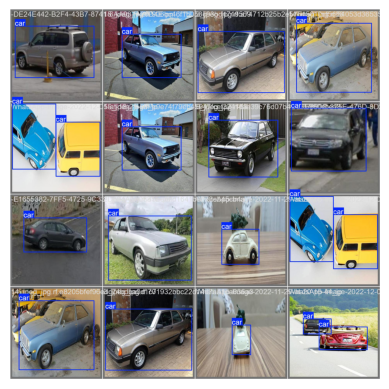

In [64]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 파일 경로 설정 (예: 'example.jpg')
image_path = 'val_batch2_labels.jpg'

# 이미지 열기
img = Image.open(image_path)

# 이미지 표시
plt.imshow(img)
plt.axis('off')  # 축 숨기기
plt.show()